# Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt


# Importing the dataset

In [2]:
data = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
data1 = data.copy()

# Overview of the dataset

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### take a look at the type, number of columns, entries, null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### to check all columns of the dataset

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# ****1.1****

# Explore the dataset

/tmp/ipykernel_47/617950561.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


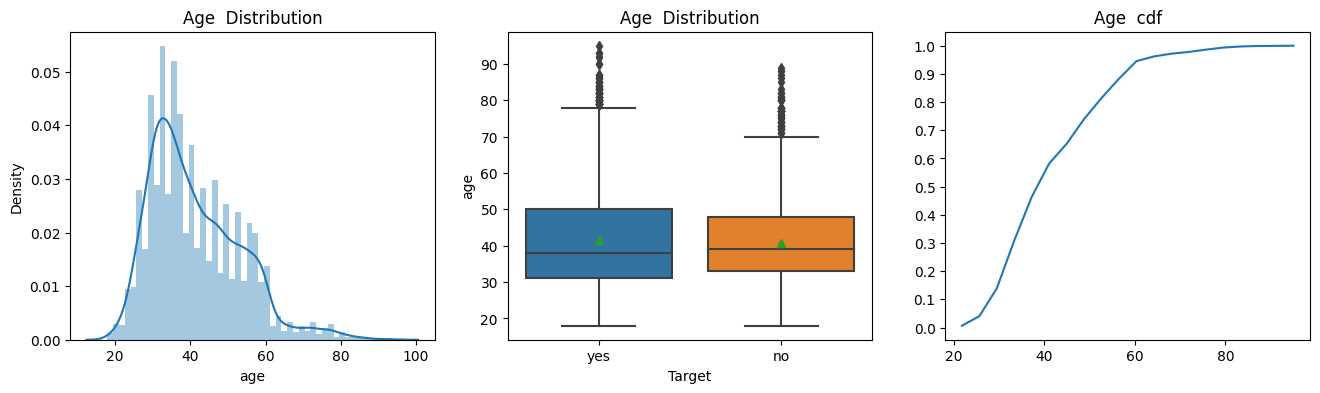

In [7]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.distplot(data['age'])
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Age  Distribution')

plt.subplot(1,3,2)
sns.boxplot(x='deposit', y='age', data =data, showmeans=True )
plt.xlabel('Target')
plt.ylabel('age')
plt.title('Age  Distribution')

plt.subplot(1,3,3)
counts, bins = np.histogram(data['age'], bins=20)
cdf = np.cumsum (counts)
plt.plot (bins[1:], cdf/cdf[-1])
plt.yticks(np.arange(0,1.1,.1))
plt.title('Age  cdf')
plt.show()

/tmp/ipykernel_47/1459907143.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['campaign'])


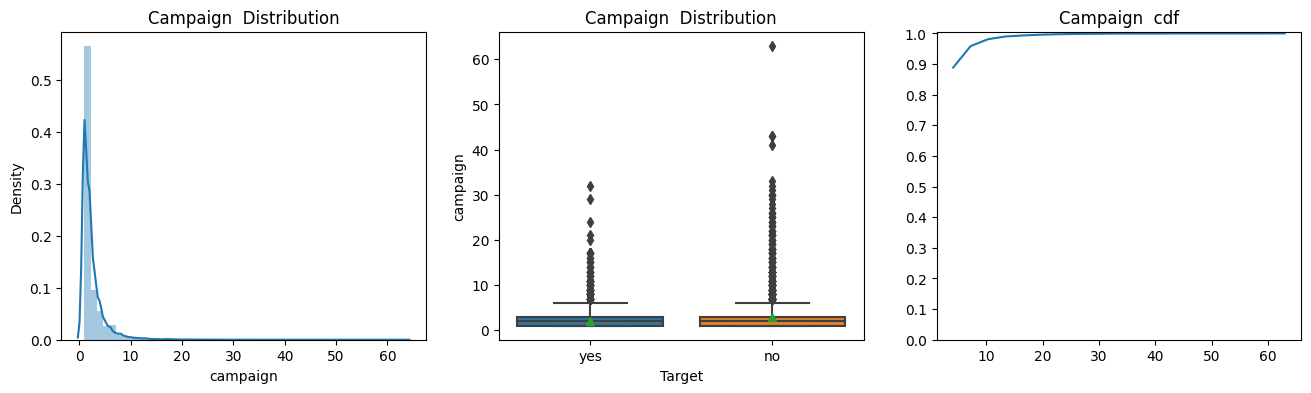

In [8]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.distplot(data['campaign'])
plt.xlabel('campaign')
plt.ylabel('Density')
plt.title('Campaign  Distribution')

plt.subplot(1,3,2)
sns.boxplot(x='deposit', y='campaign', data =data, showmeans=True )
plt.xlabel('Target')
plt.ylabel('campaign')
plt.title('Campaign  Distribution')

plt.subplot(1,3,3)
counts, bins = np.histogram(data['campaign'], bins=20)
cdf = np.cumsum (counts)
plt.plot (bins[1:], cdf/cdf[-1])
plt.yticks(np.arange(0,1.1,.1))
plt.title('Campaign  cdf')
plt.show()

/tmp/ipykernel_47/4141900522.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['duration'])


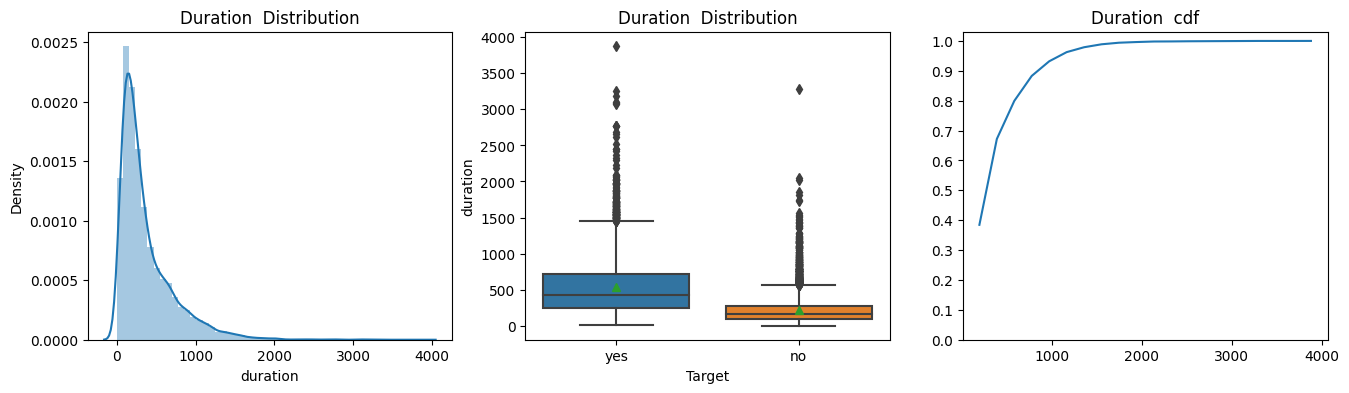

In [9]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.distplot(data['duration'])
plt.xlabel('duration')
plt.ylabel('Density')
plt.title('Duration  Distribution')

plt.subplot(1,3,2)
sns.boxplot(x='deposit', y='duration', data =data, showmeans=True )
plt.xlabel('Target')
plt.ylabel('duration')
plt.title('Duration  Distribution')

plt.subplot(1,3,3)
counts, bins = np.histogram(data['duration'], bins=20)
cdf = np.cumsum (counts)
plt.plot (bins[1:], cdf/cdf[-1])
plt.yticks(np.arange(0,1.1,.1))
plt.title('Duration  cdf')
plt.show()

### Categorical features

Text(0.5, 1.0, 'Count of contacts made in each month')

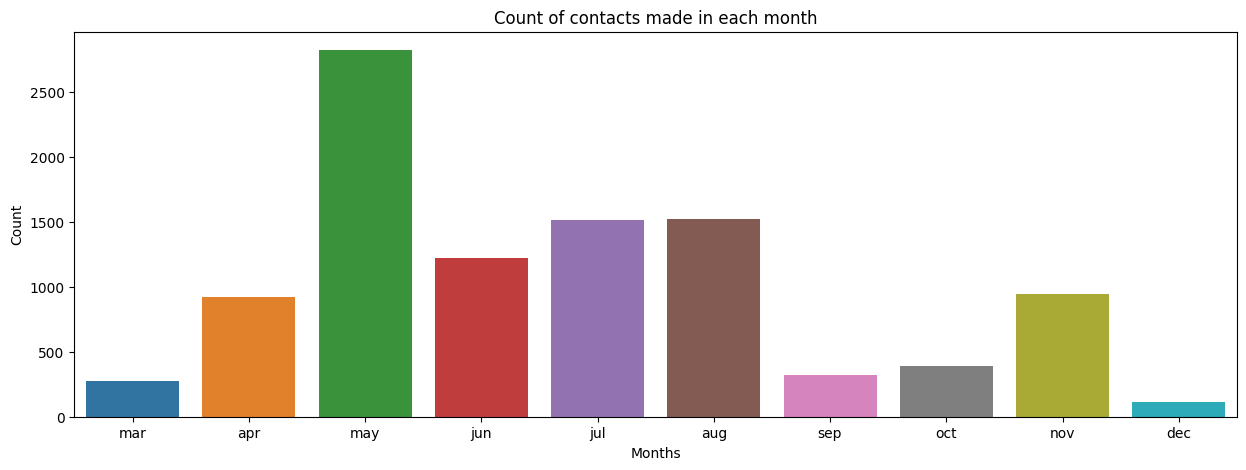

In [10]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = data, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

In [11]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    return plt

In [12]:
def feature_perc(feature,groupby= 'yes'):

    count = dfgrouped.get_group(groupby)[feature].value_counts()
    total_count = data[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 

In [13]:
dfgrouped = data.groupby('deposit')

In [14]:
obj_column = data.dtypes[data.dtypes == 'object'].index

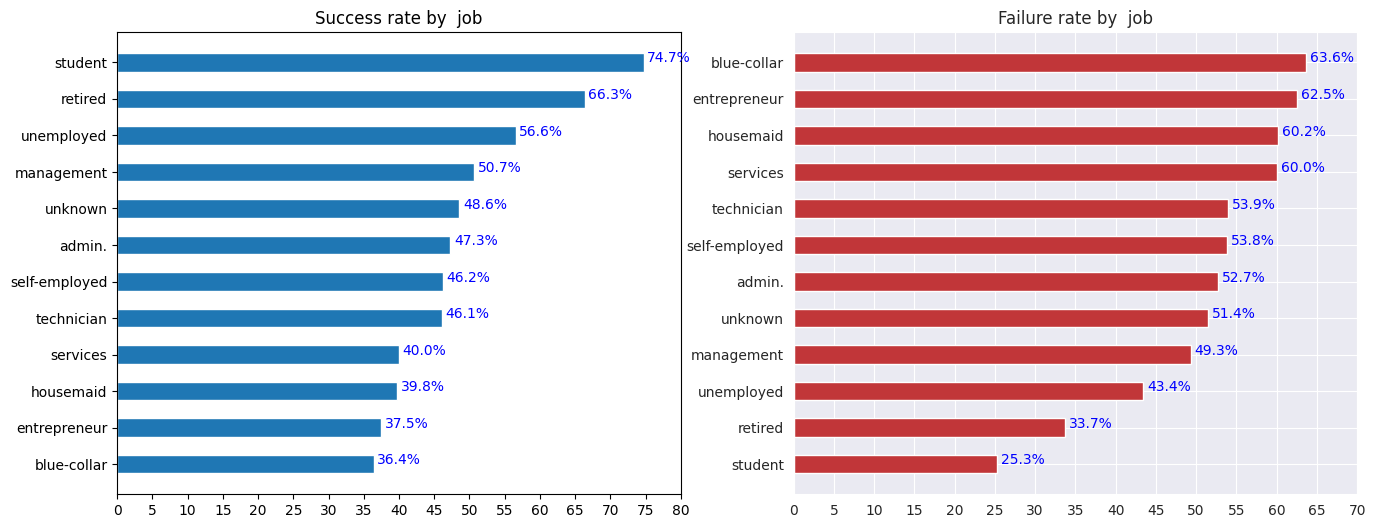

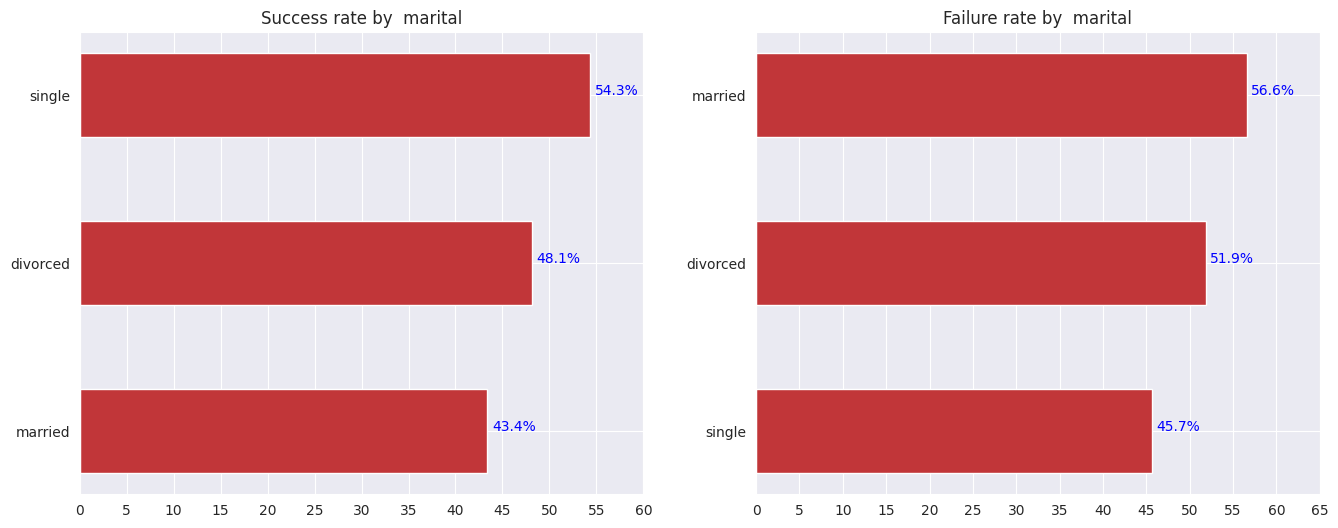

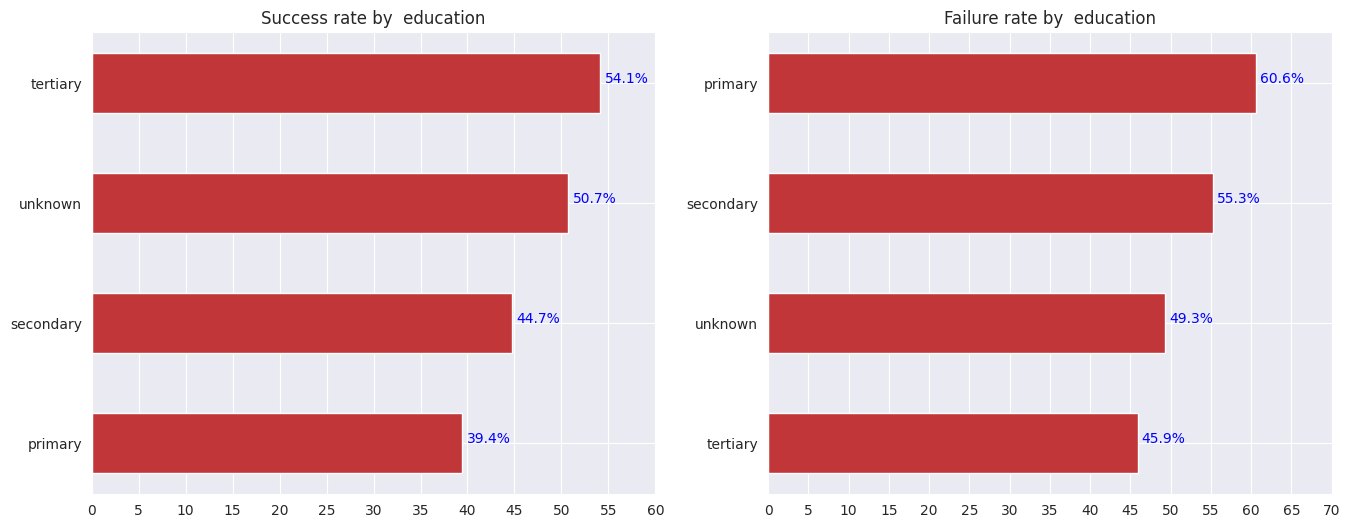

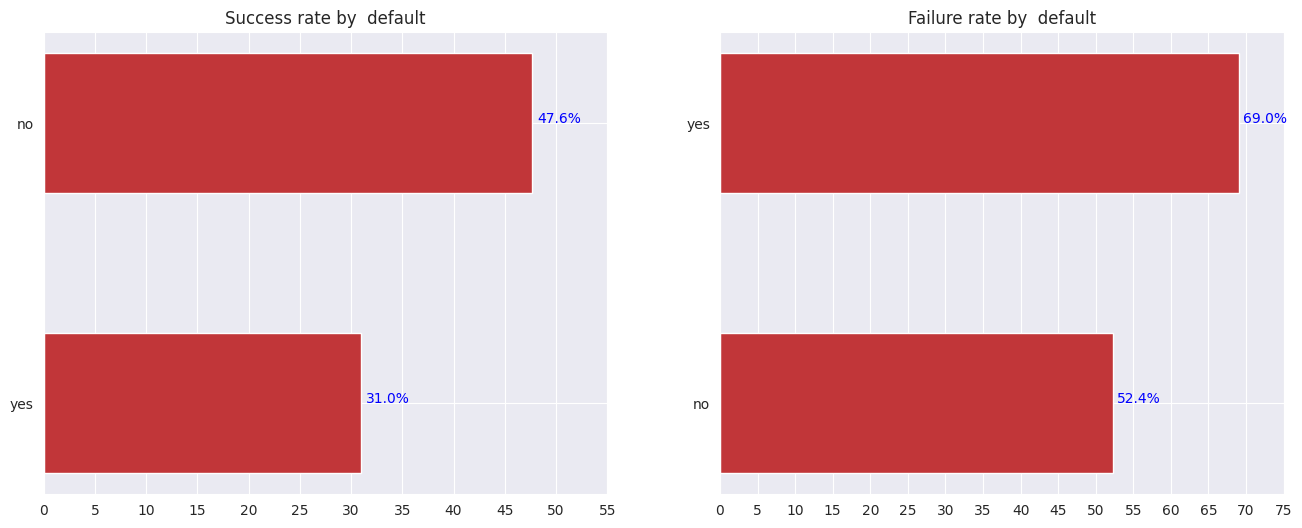

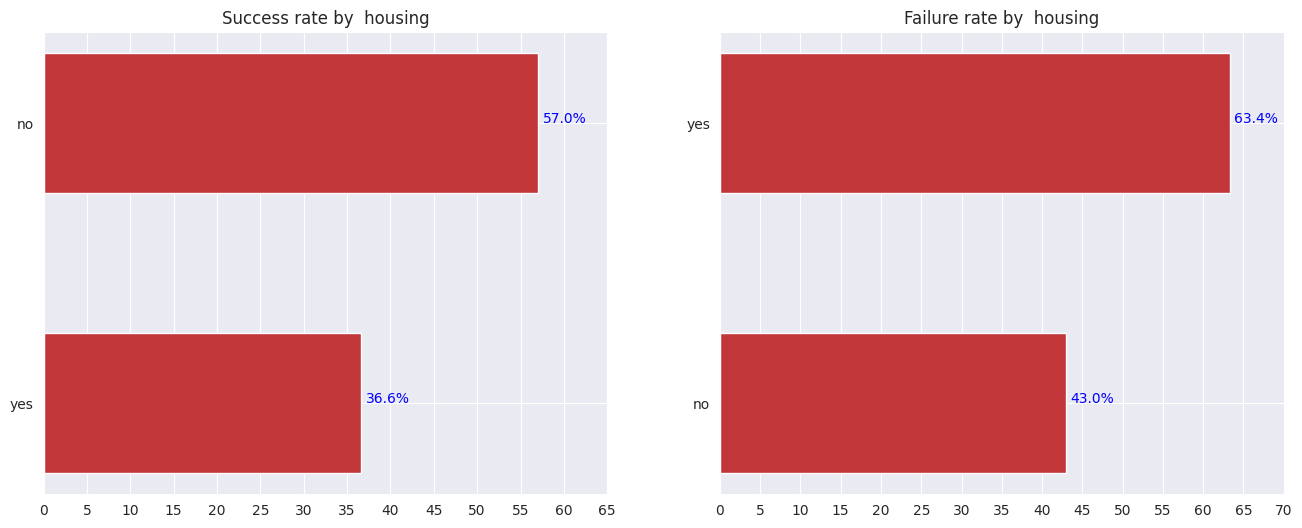

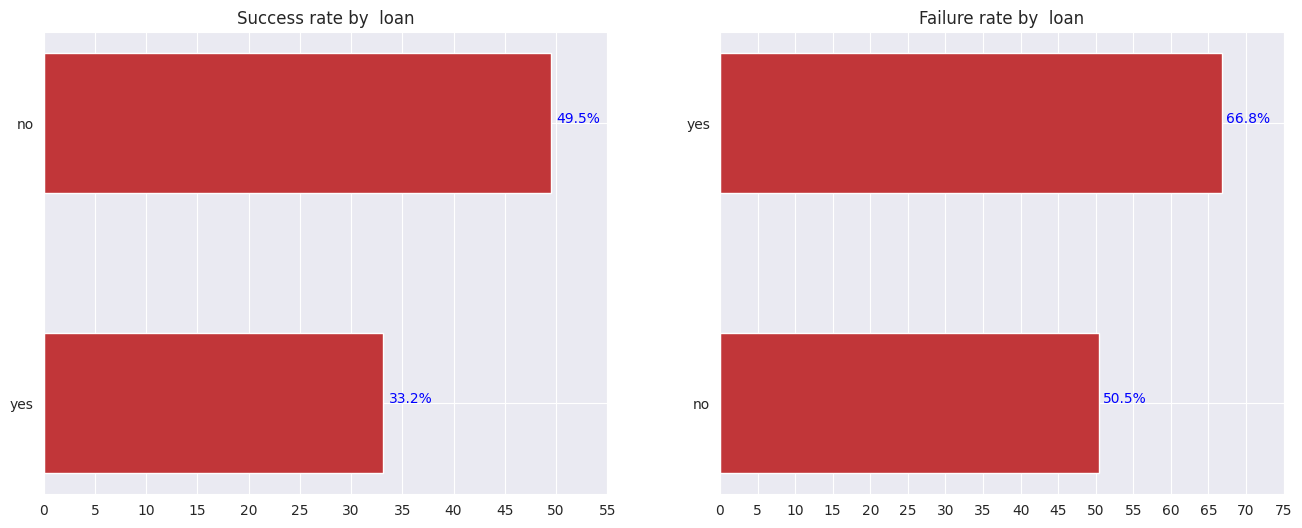

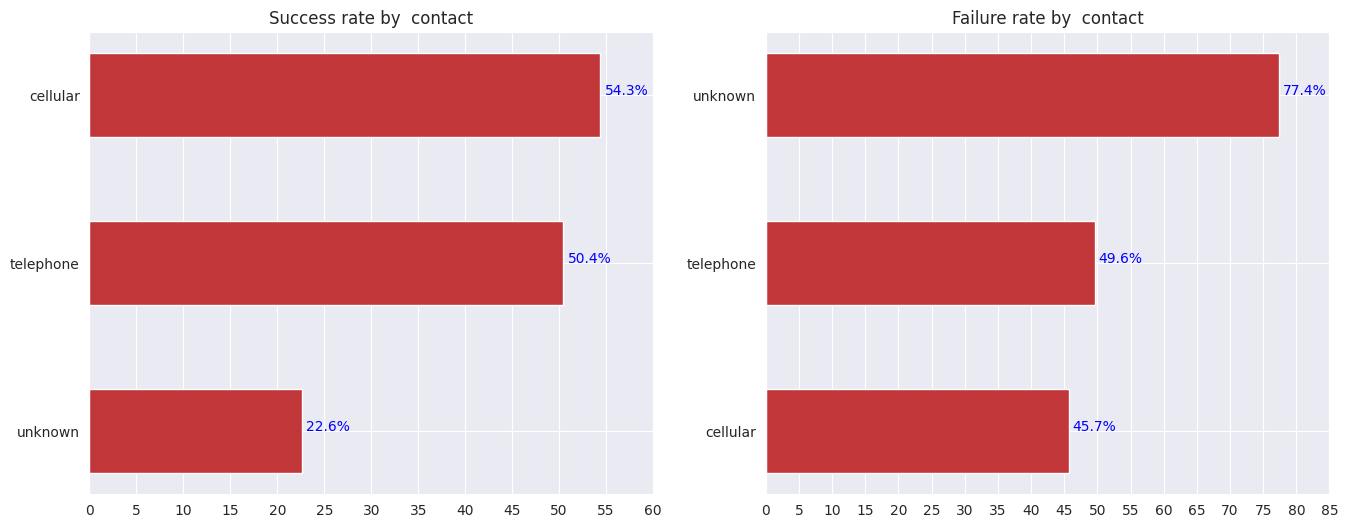

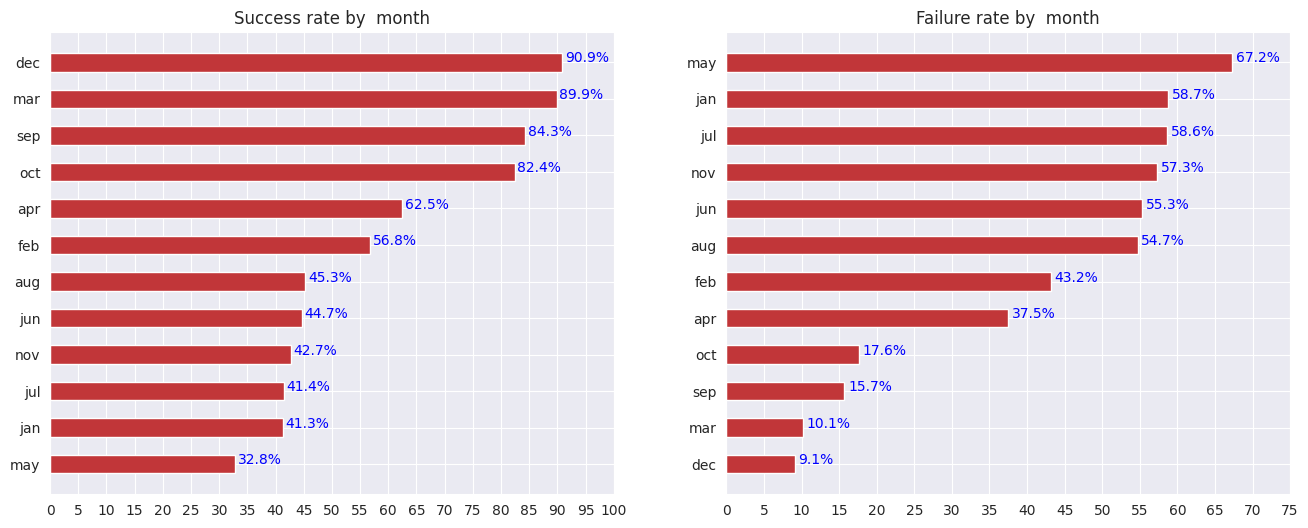

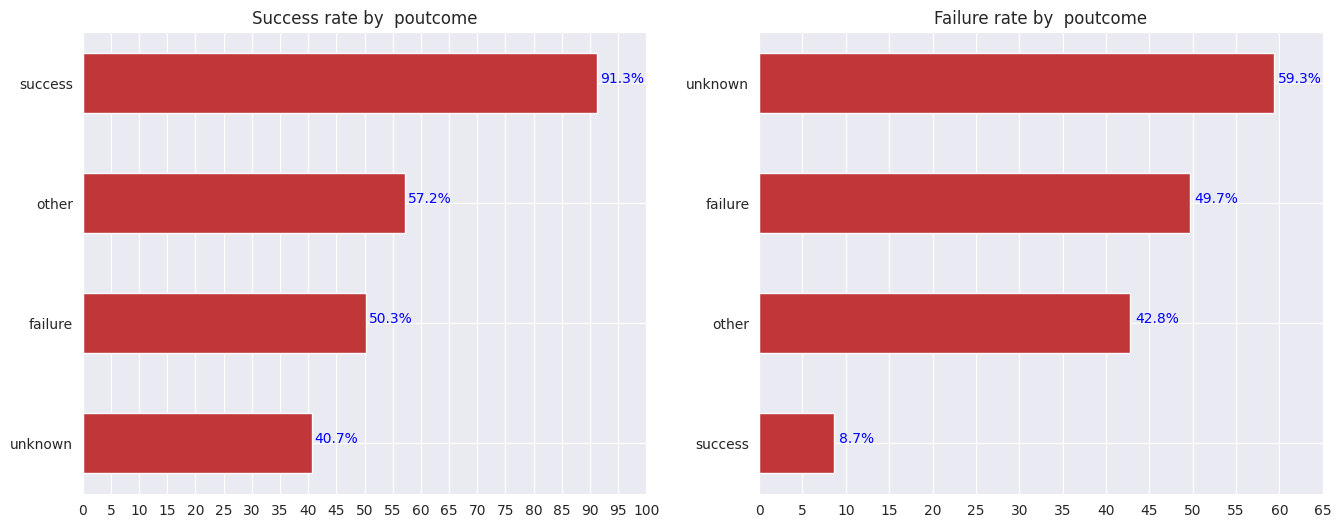

In [15]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()

In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
print('Jobs:\n', data['job'].unique())

Jobs:
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


In [18]:
print('Marital:\n', data['marital'].unique())

Marital:
 ['married' 'single' 'divorced']


In [19]:
print('Education:\n', data['education'].unique())

Education:
 ['secondary' 'tertiary' 'primary' 'unknown']


In [20]:
print('Default:\n', data['default'].unique())
print('Housing:\n', data['housing'].unique())
print('Loan:\n', data['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


In [21]:
print('Contact:\n', data['contact'].unique())

Contact:
 ['unknown' 'cellular' 'telephone']


In [22]:
print('Poutcome:\n', data['poutcome'].unique())

Poutcome:
 ['unknown' 'other' 'failure' 'success']


### Numerical features

> #### AGE

to find some strange values or null values

In [23]:
print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())
print('Null Values: ', data['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


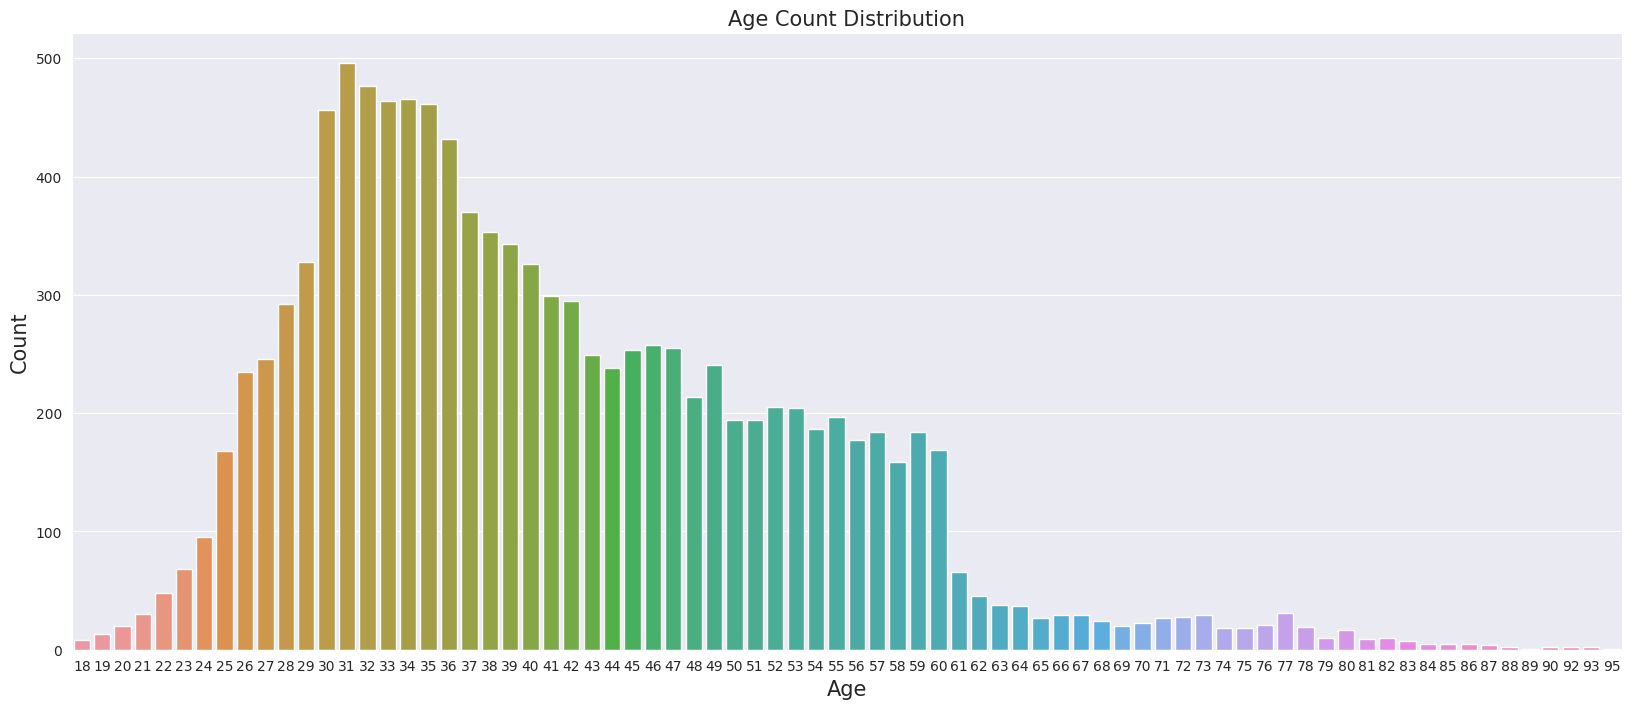

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_47/3392749691.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], ax = ax2)


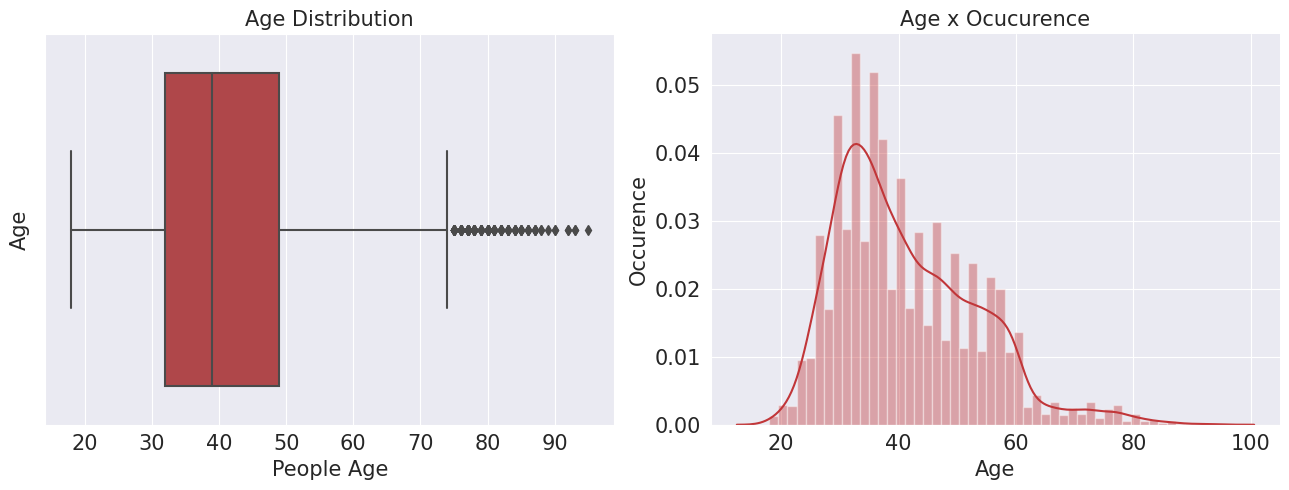

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [26]:
print('1º Quartile: ', data['age'].quantile(q = 0.25))
print('2º Quartile: ', data['age'].quantile(q = 0.50))
print('3º Quartile: ', data['age'].quantile(q = 0.75))
print('4º Quartile: ', data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  39.0
3º Quartile:  49.0
4º Quartile:  95.0
Ages above:  74.5 are outliers


In [27]:
print('Numerber of outliers: ', data[data['age'] > 69.6]['age'].count())
print('Number of clients: ', len(data))
#Outliers in %
print('Outliers are:', round(data[data['age'] > 69.6]['age'].count()*100/len(data),2), '%')

Numerber of outliers:  296
Number of clients:  11162
Outliers are: 2.65 %


Calculating some values to evaluete this independent variable

In [28]:
print('STD :', round(data['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(data['age'].std()*100/data['age'].mean(), 1), ', High middle dispersion')

STD : 11.9
CV  : 28.9 , High middle dispersion


A low standard deviation indicates that the data points tend to be close to the mean or expected value. A high standard deviation indicates that the data points are scattered

In [29]:
print('MEAN:', round(data['age'].mean(), 1))

MEAN: 41.2


I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100

cv < 15%, low dispersion  and  cv > 30%, high dispersion

In [30]:
print('CV  :',round(data['age'].std()*100/data['age'].mean(), 1), ', High middle dispersion')

CV  : 28.9 , High middle dispersion


About 'Age' feature, because dispersion is almost high we cannot conclude if age have a high effect to our variable y. So we need to keep searching for some pattern. high middle dispersion means that we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated too.

> #### JOBS

What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation

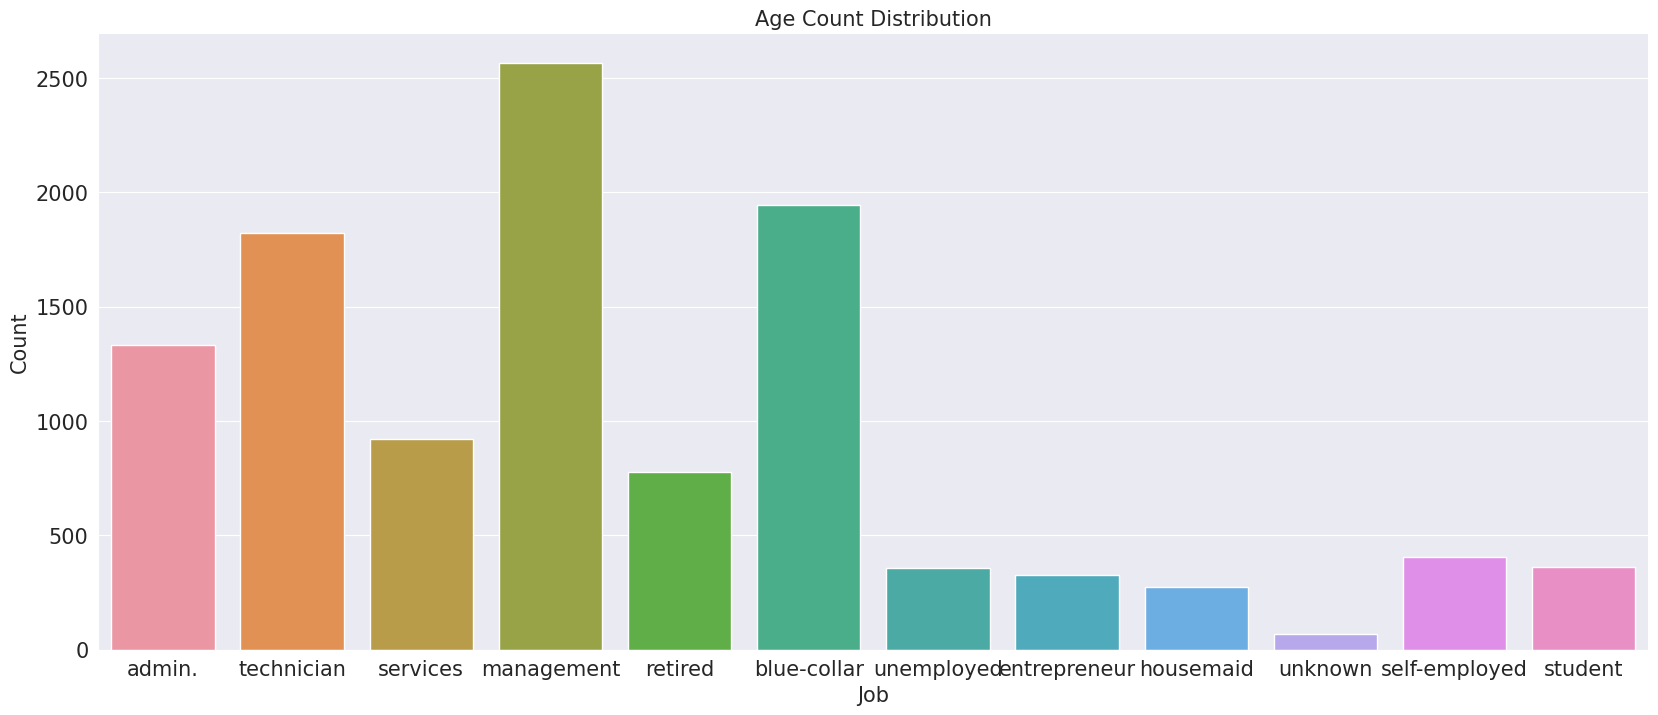

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Text(0.5, 1.0, 'log(Duration) vs Jobs')

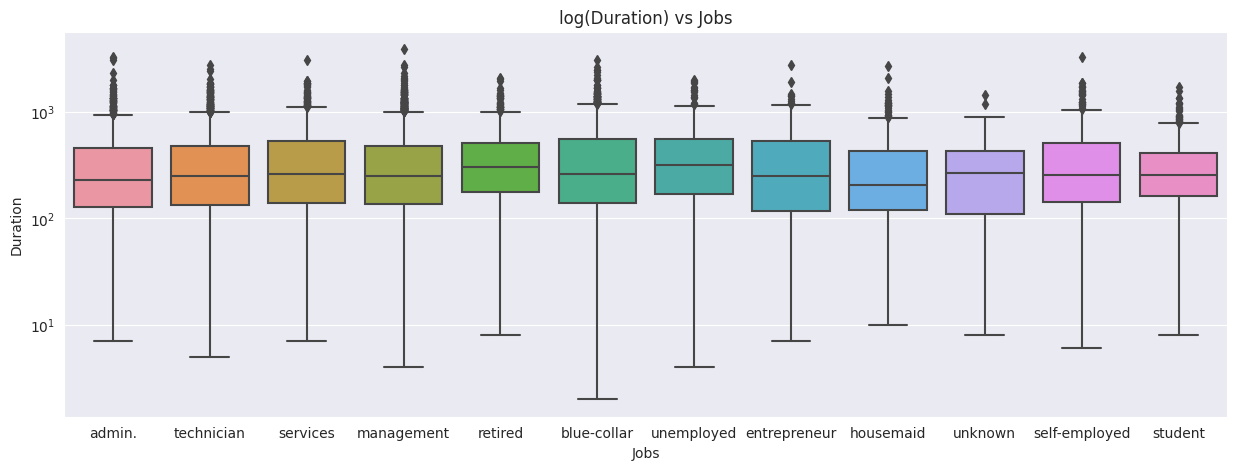

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = data, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

> 

What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation

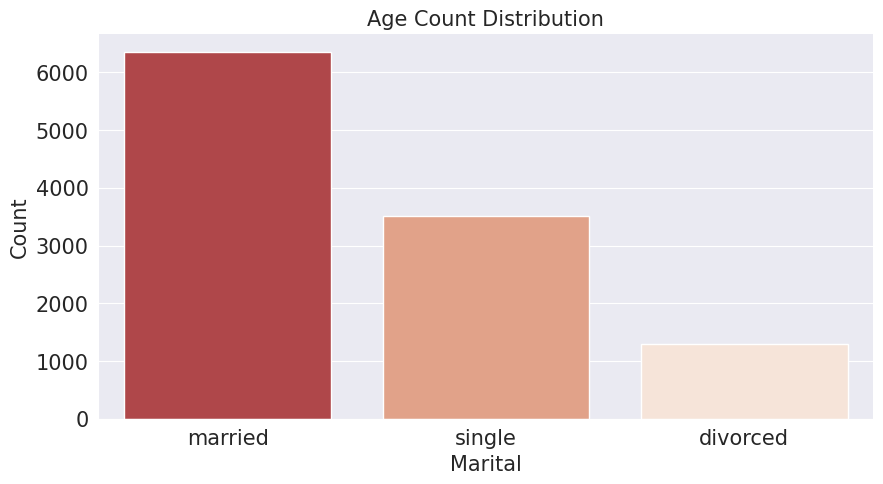

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = data)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

> #### EDUCATION

What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation

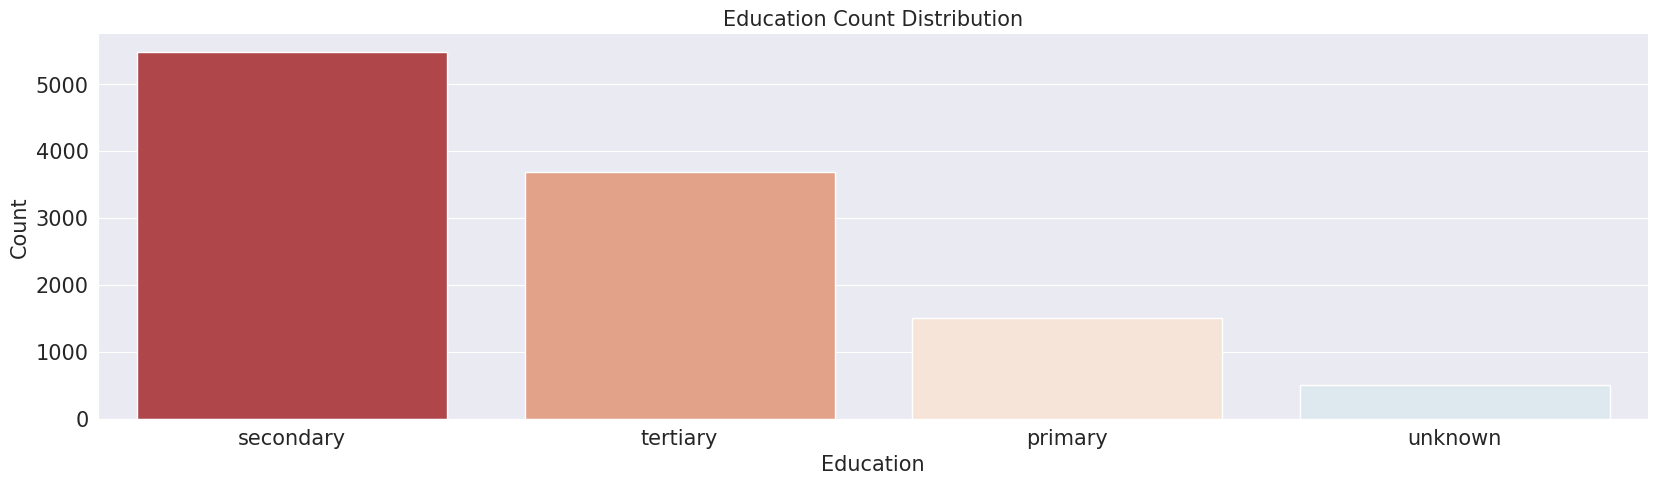

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

> #### DEFAULT, HOUSING, LOAN

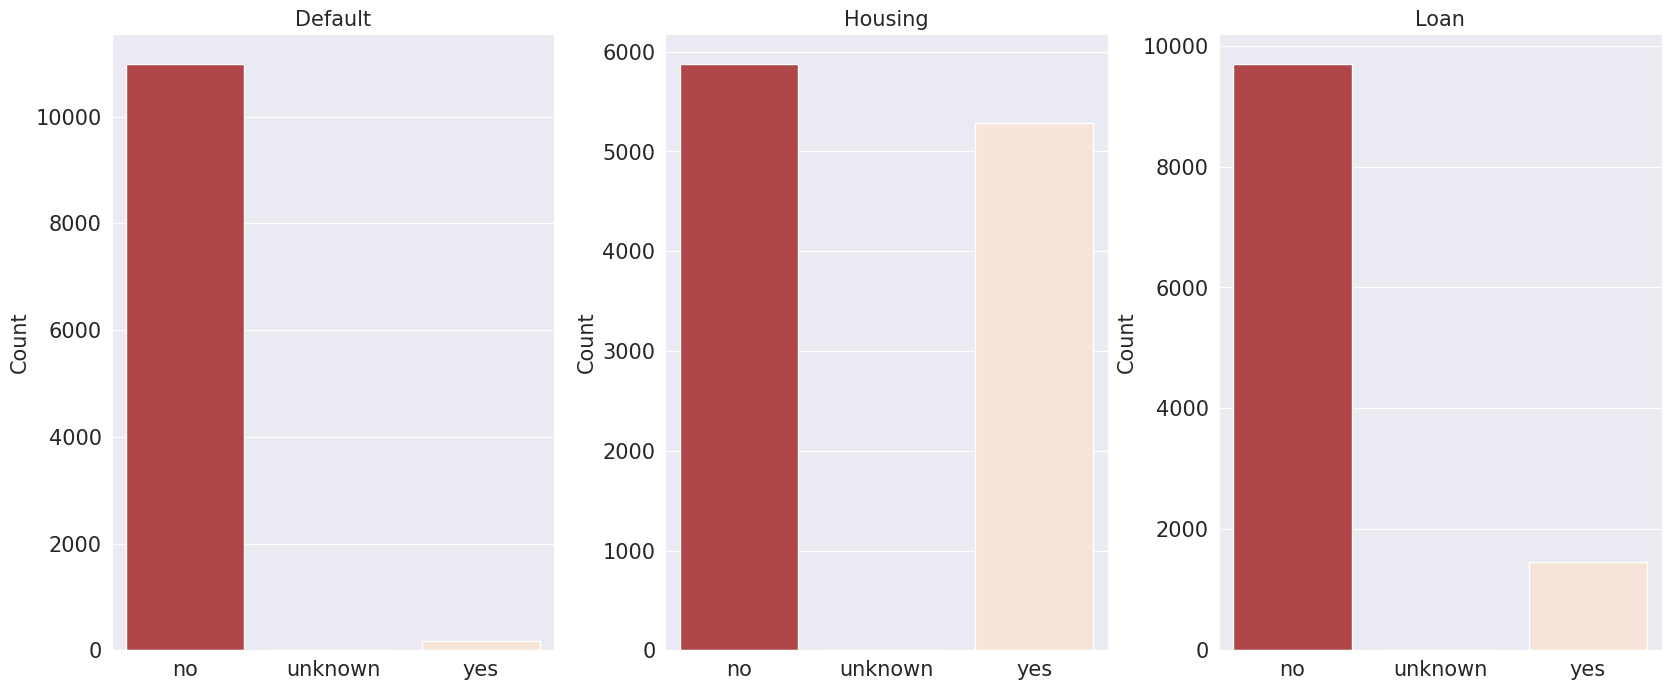

In [35]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = data, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = data, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [36]:
print('Default:\n No credit in default:'     , data[data['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', data[data['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , data[data['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 10994 
 Unknown credit in default: 0 
 Yes to credit in default: 168


In [37]:
print('Housing:\n No housing in loan:'     , data[data['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', data[data['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , data[data['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 5881 
 Unknown housing in loan: 0 
 Yes to housing in loan: 5281


In [38]:
print('Housing:\n No to personal loan:'     , data[data['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', data[data['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , data[data['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 9702 
 Unknown to personal loan: 0 
 Yes to personal loan: 1460


The ages did not mean so much and had a medium dispersion and did not make meaningful relation with other variables. The best analisys for Jobs, Marital and Education is to count of each variable. Default, loan and housing, it is just to see the distribution of people.

# ****1.2****

### Related with the last contact of the current campaign

##### Treat categorical, see those values
##### group continuous variables if necessary

In [39]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [40]:
print("Kind of Contact: \n", data['contact'].unique())
print("\nWhich monthis this campaing work: \n", data['month'].unique())
print("\nWhich days of week this campaing work: \n", data['day'].unique())

Kind of Contact: 
 ['unknown' 'cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]


> #### Duration

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_47/1638223835.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['duration'], ax = ax2)


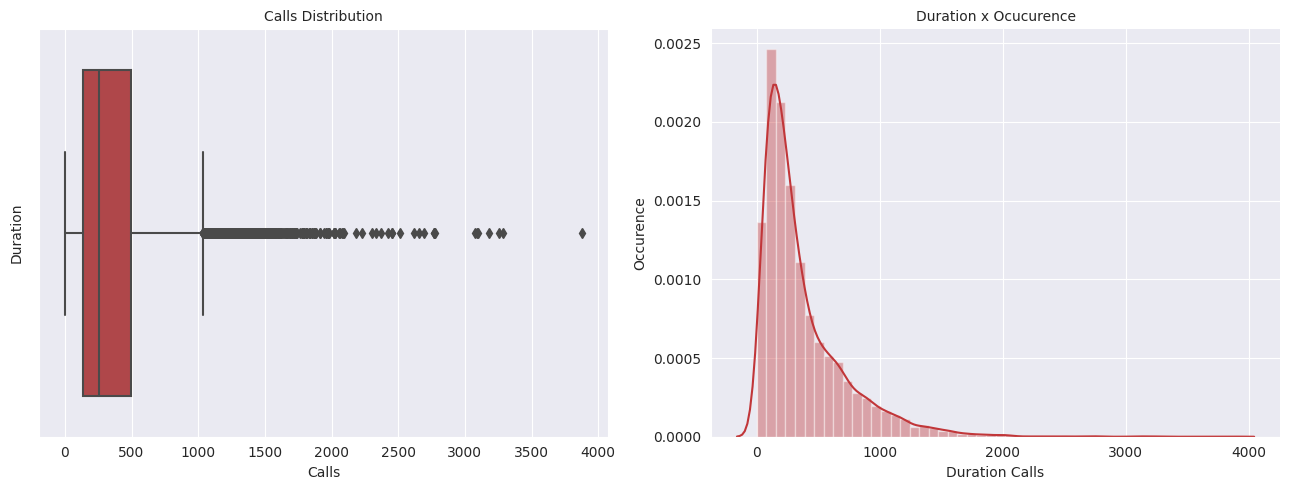

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(data['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [42]:
print("Max duration  call in minutes:  ", round((data['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((data['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((data['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((data['duration'].std()/60),1))

Max duration  call in minutes:   64.7
Min duration  call in minutes:    0.0
Mean duration call in minutes:    6.2
STD duration  call in minutes:    5.8


In [43]:
# Quartiles
print('1º Quartile: ', data['duration'].quantile(q = 0.25))
print('2º Quartile: ', data['duration'].quantile(q = 0.50))
print('3º Quartile: ', data['duration'].quantile(q = 0.75))
print('4º Quartile: ', data['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', data['duration'].quantile(q = 0.75) + 
                      1.5*(data['duration'].quantile(q = 0.75) - data['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  138.0
2º Quartile:  255.0
3º Quartile:  496.0
4º Quartile:  3881.0
Duration calls above:  1033.0 are outliers


In [44]:
print('Numerber of outliers: ', data[data['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(data))
#Outliers in %
print('Outliers are:', round(data[data['duration'] > 644.5]['duration'].count()*100/len(data),2), '%')

Numerber of outliers:  1901
Number of clients:  11162
Outliers are: 17.03 %


In [45]:
data['contact']

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
11157    cellular
11158     unknown
11159    cellular
11160    cellular
11161    cellular
Name: contact, Length: 11162, dtype: object

### Age and balance relation


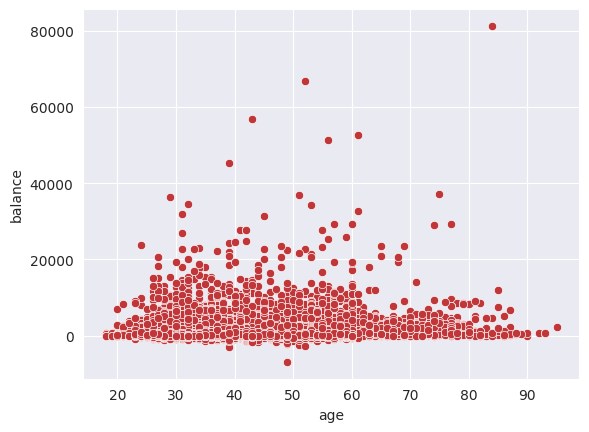

In [46]:
sns.scatterplot(x='age', y='balance', data=data)
plt.show()

### age, balance, day, duration and campaign

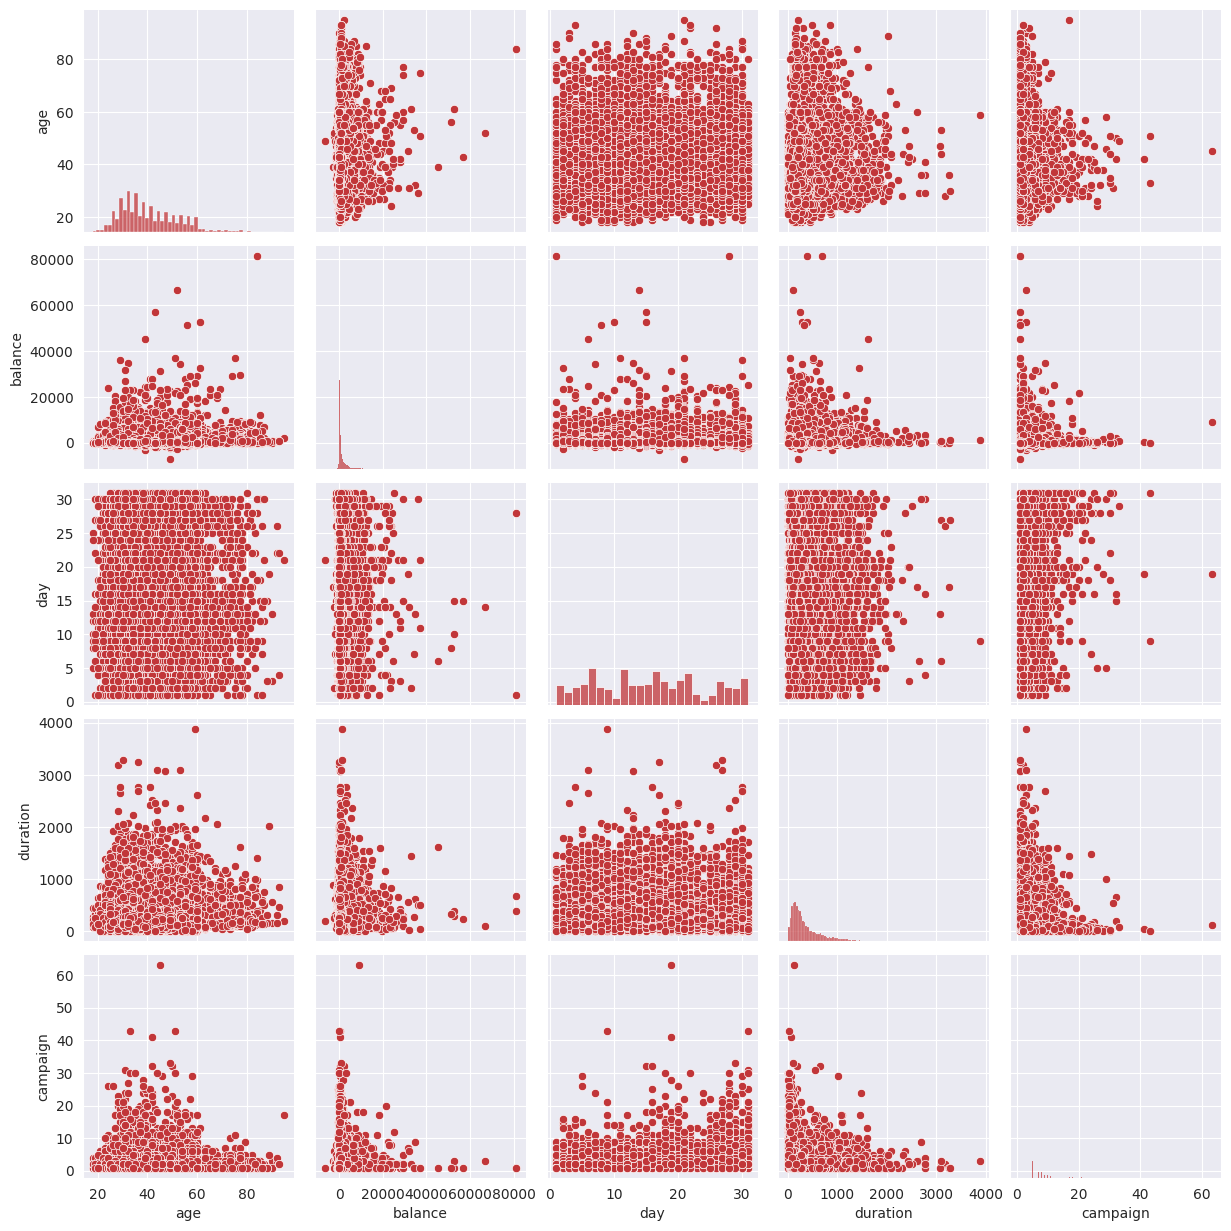

In [47]:
sns.pairplot(data[['age', 'balance', 'day', 'duration', 'campaign']])
plt.show()

### Marital and job relation

In [48]:
crosstab_result = pd.crosstab(data['job'], data['marital'])
print(crosstab_result)

marital        divorced  married  single
job                                     
admin.              182      677     475
blue-collar         149     1335     460
entrepreneur         42      234      52
housemaid            46      190      38
management          288     1428     850
retired             171      581      26
self-employed        39      222     144
services            121      504     298
student               2       15     343
technician          204      930     689
unemployed           47      186     124
unknown               2       49      19


### Account balance, which marketing campaign should focus on

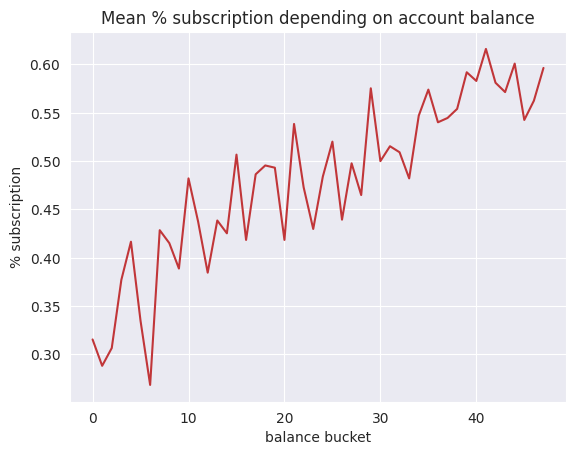

In [49]:
df_new = data.copy()

df_new['deposit'] = df_new['deposit'].map({'yes': 1, 'no': 0})

#introduce new column 'balance_buckets' to  ''
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [50]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance greater than 1490$

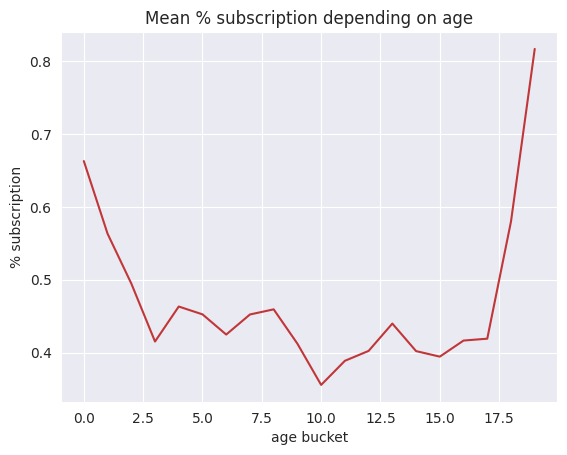

In [51]:
#introduce new column 'age_buckets' to  ''
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['deposit'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

# Categorical Features encoding

Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllyed later

In [52]:
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan'])
data['contact']     = labelencoder_X.fit_transform(data['contact']) 


function to creat group of ages, this helps because we have 78 differente values here

In [53]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [54]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,3,0,1,1,0,2343,1,0,2,5,may,1042,1,-1,0,unknown,yes
1,3,0,1,1,0,45,0,0,2,5,may,1467,1,-1,0,unknown,yes
2,2,9,1,1,0,1270,1,0,2,5,may,1389,1,-1,0,unknown,yes
3,3,7,1,1,0,2476,1,0,2,5,may,579,1,-1,0,unknown,yes
4,3,0,1,2,0,184,0,0,2,5,may,673,2,-1,0,unknown,yes


In [55]:
data = pd.get_dummies(data = data, columns = ['poutcome'], prefix = ['poutcome'], drop_first = True)


In [56]:
le = LabelEncoder()
data['month'] = le.fit_transform(data['month'])

In [57]:
months_in_year = 12
data['month_sin'] = np.sin(2 * np.pi * data['month'] / months_in_year)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / months_in_year)

# Drop the original 'month' column if needed
# df = df.drop('month', axis=1)

# Display the modified DataFrame
print(data[['month_sin', 'month_cos']])

          month_sin  month_cos
0     -8.660254e-01  -0.500000
1     -8.660254e-01  -0.500000
2     -8.660254e-01  -0.500000
3     -8.660254e-01  -0.500000
4     -8.660254e-01  -0.500000
...             ...        ...
11157  0.000000e+00   1.000000
11158  1.224647e-16  -1.000000
11159  5.000000e-01   0.866025
11160 -8.660254e-01  -0.500000
11161  5.000000e-01  -0.866025

[11162 rows x 2 columns]


In [58]:
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

print(data[['deposit']])

       deposit
0            1
1            1
2            1
3            1
4            1
...        ...
11157        0
11158        0
11159        0
11160        0
11161        0

[11162 rows x 1 columns]


# Feature engineering

Generate correlation matrix heat map to check which feature has greatest influence on the output 


<Axes: >

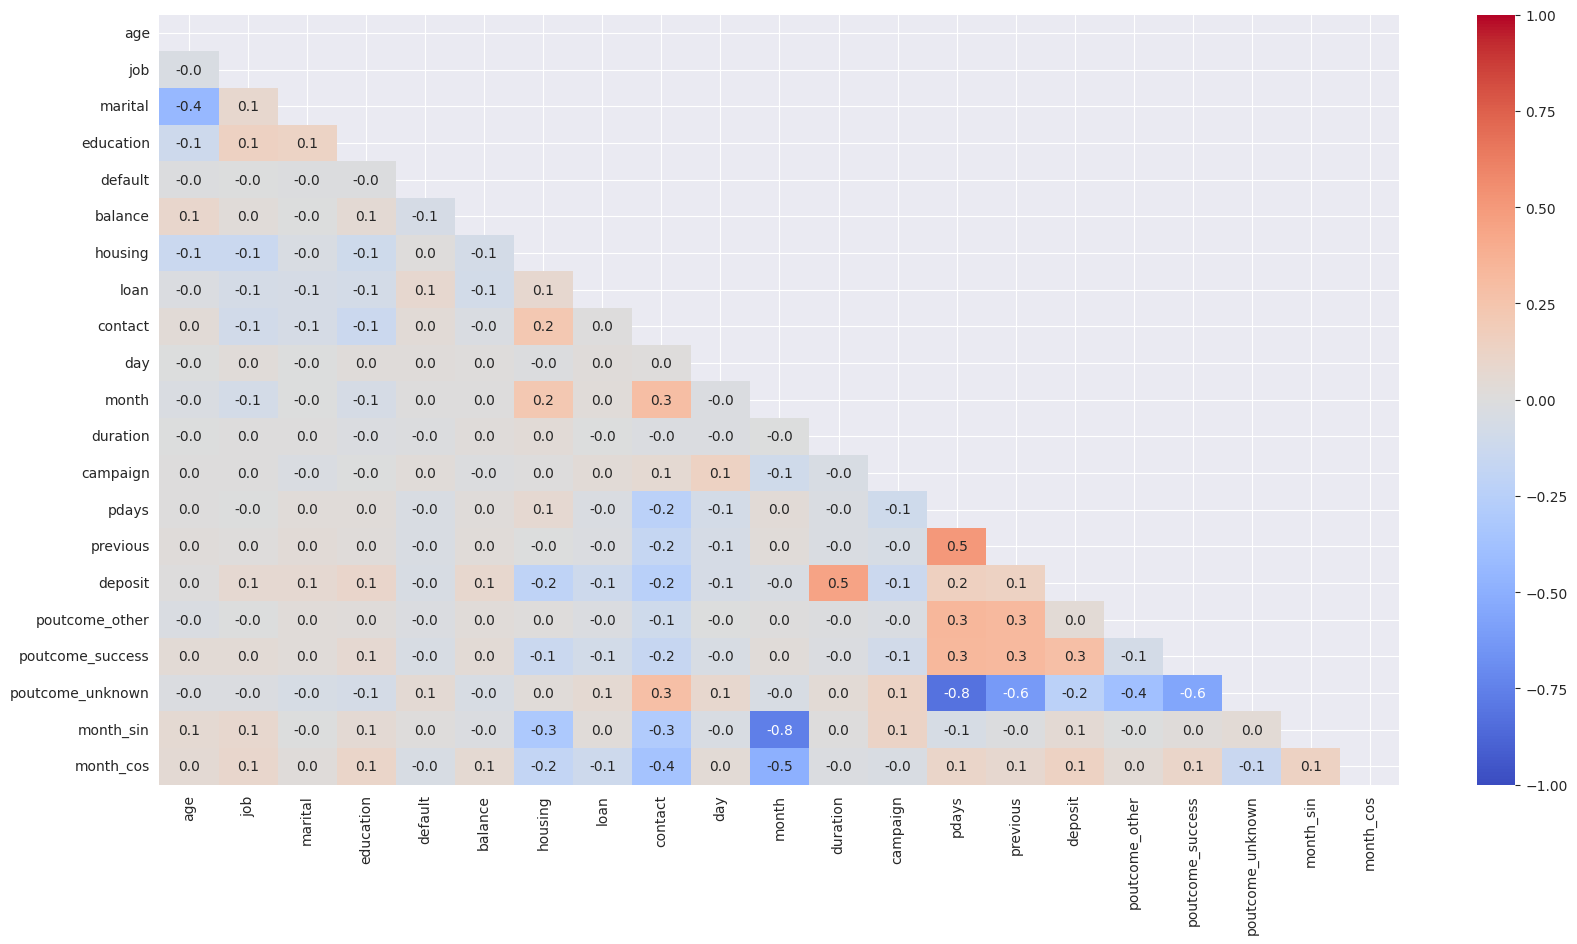

In [59]:
fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

# Normalization

In [60]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_sin', 'month_cos'],
      dtype='object')

In [61]:
numerical_features = ['balance', 'duration', 'previous']

scaler = MinMaxScaler()

# Fit the scaler on the numerical features and transform them
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the modified DataFrame with normalized features
print(data[numerical_features])

        balance  duration  previous
0      0.104371  0.268110  0.000000
1      0.078273  0.377675  0.000000
2      0.092185  0.357566  0.000000
3      0.105882  0.148750  0.000000
4      0.079851  0.172983  0.000000
...         ...       ...       ...
11157  0.077773  0.065739  0.000000
11158  0.086086  0.020882  0.000000
11159  0.078091  0.039701  0.000000
11160  0.077762  0.001805  0.086207
11161  0.077762  0.161382  0.000000

[11162 rows x 3 columns]


# ****1.3****

### To explore various time-related columns like day and month  and their relation to deposit column

> #### 'day' and 'month'

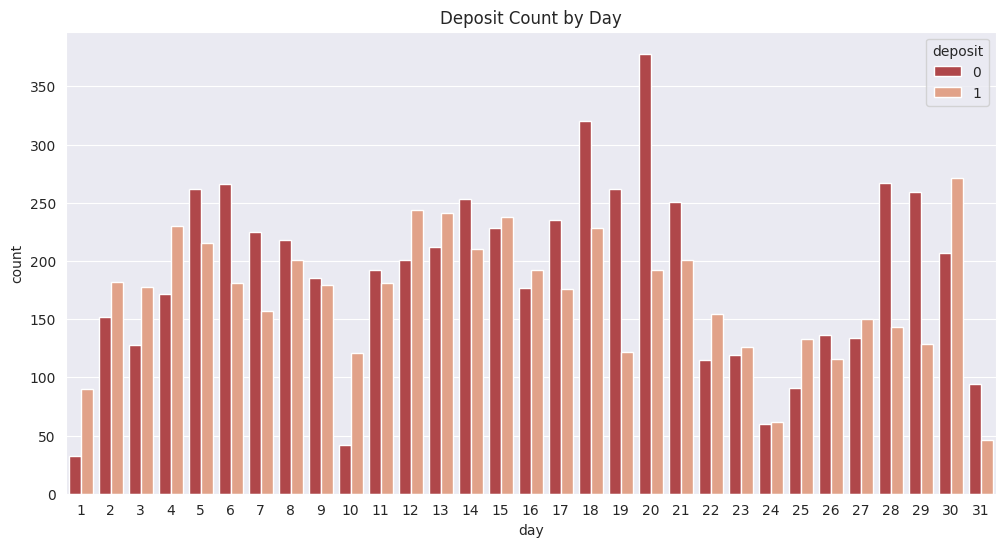

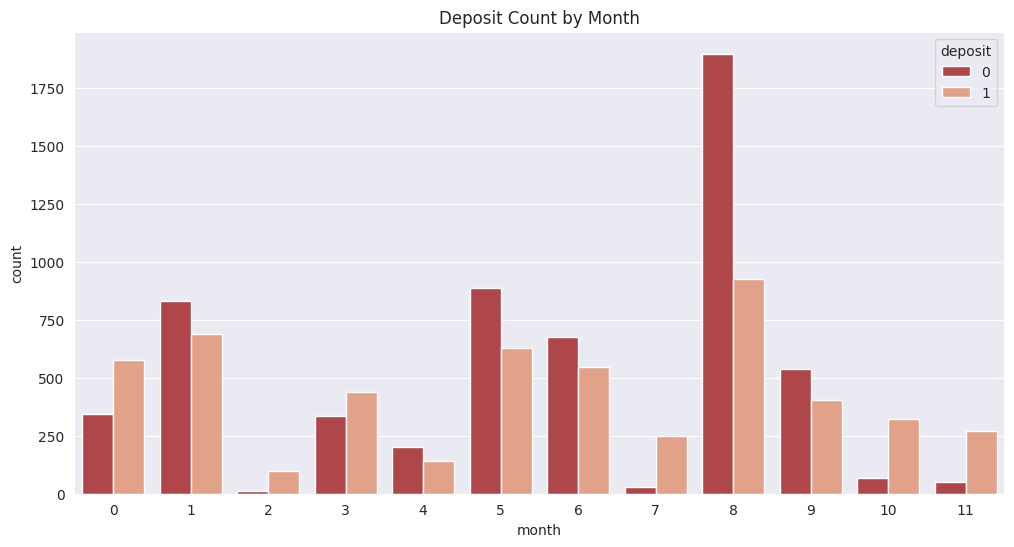

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='deposit', data=data)
plt.title('Deposit Count by Day')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='deposit', data=data)
plt.title('Deposit Count by Month')
plt.show()

> #### 'duration' column

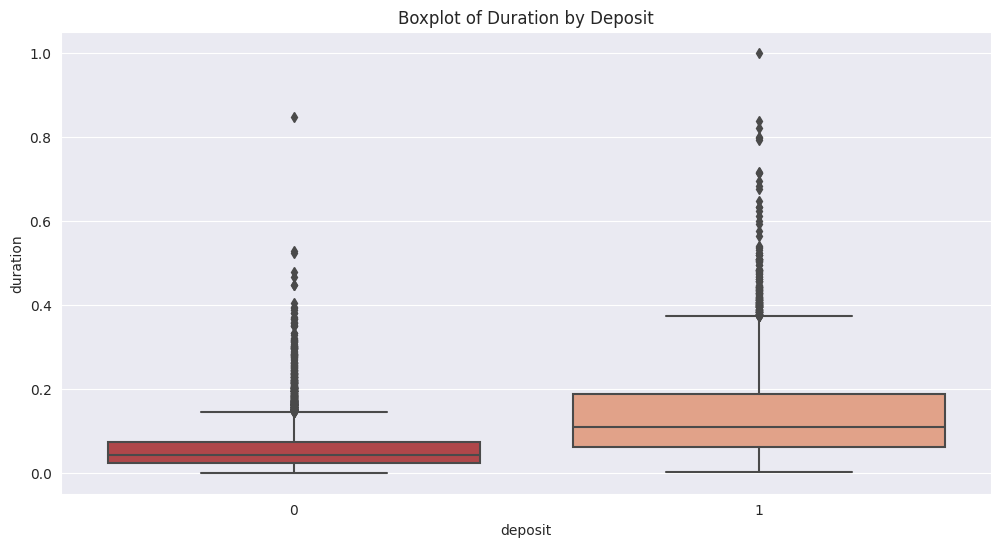

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deposit', y='duration', data=data)
plt.title('Boxplot of Duration by Deposit')
plt.show()


> #### 'campaign' column

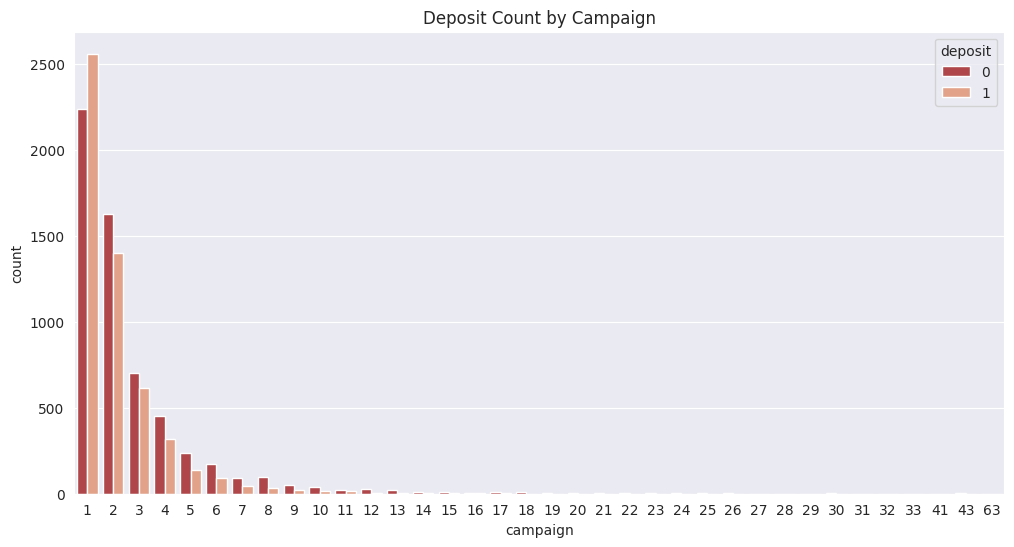

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='campaign', hue='deposit', data=data)
plt.title('Deposit Count by Campaign')
plt.show()

> #### 'pdays' column

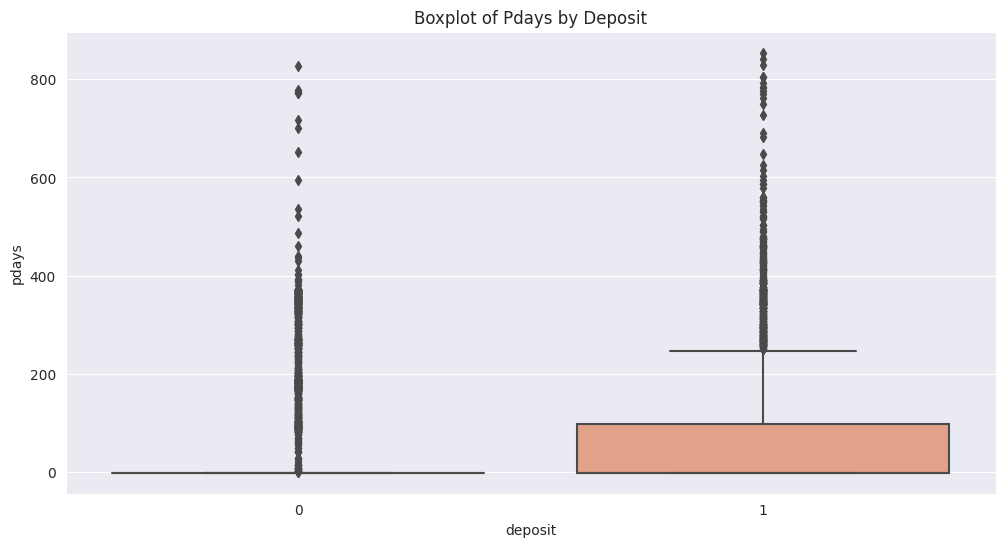

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deposit', y='pdays', data=data)
plt.title('Boxplot of Pdays by Deposit')
plt.show()

> #### 'previous' column

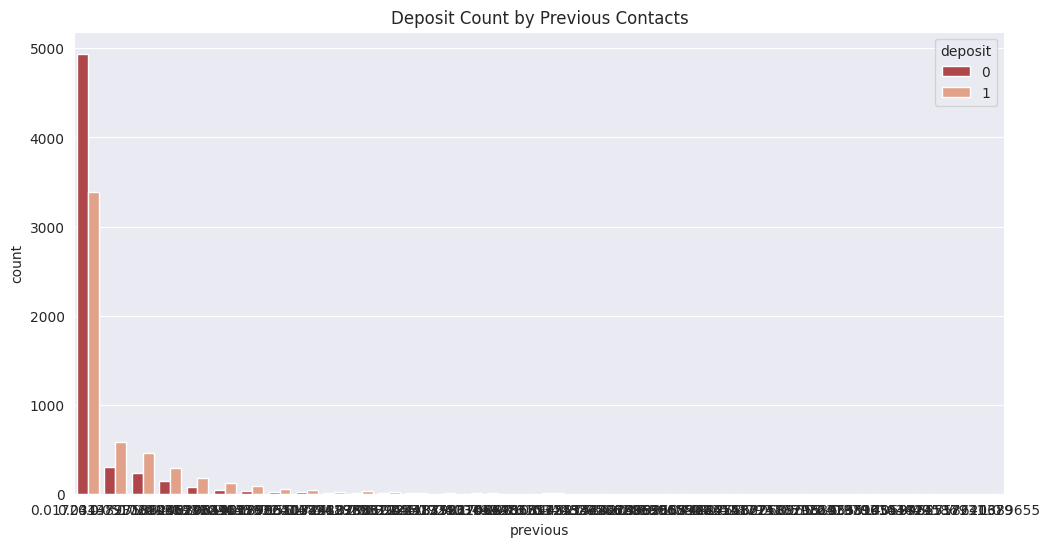

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='previous', hue='deposit', data=data)
plt.title('Deposit Count by Previous Contacts')
plt.show()

> #### temporal trends

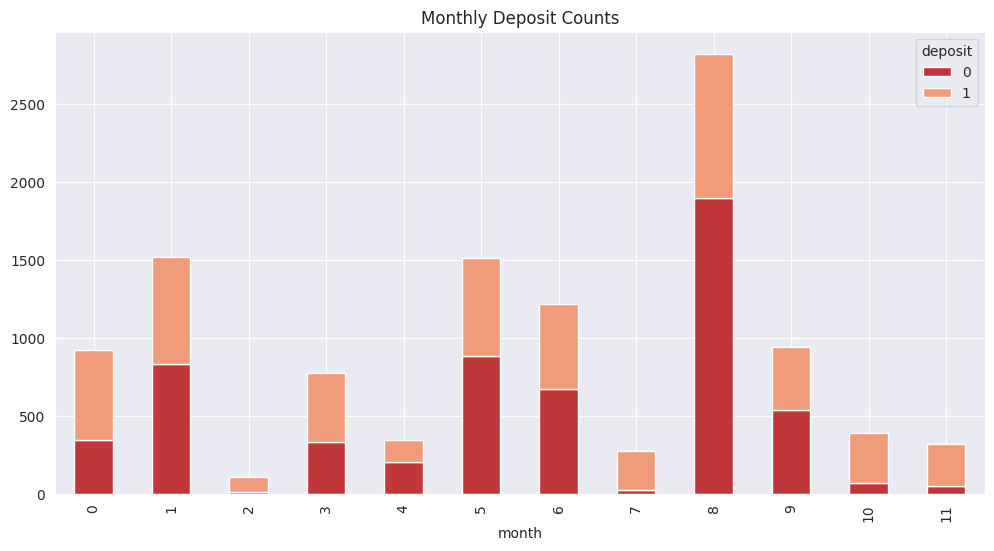

In [80]:
monthly_deposit_counts = data.groupby('month')['deposit'].value_counts().unstack().fillna(0)
monthly_deposit_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Deposit Counts')
plt.show()

We can compute correlation matrices to identify relationships between different columns so we explore correlation with the target variable ('deposit') to find hidden dependencies.

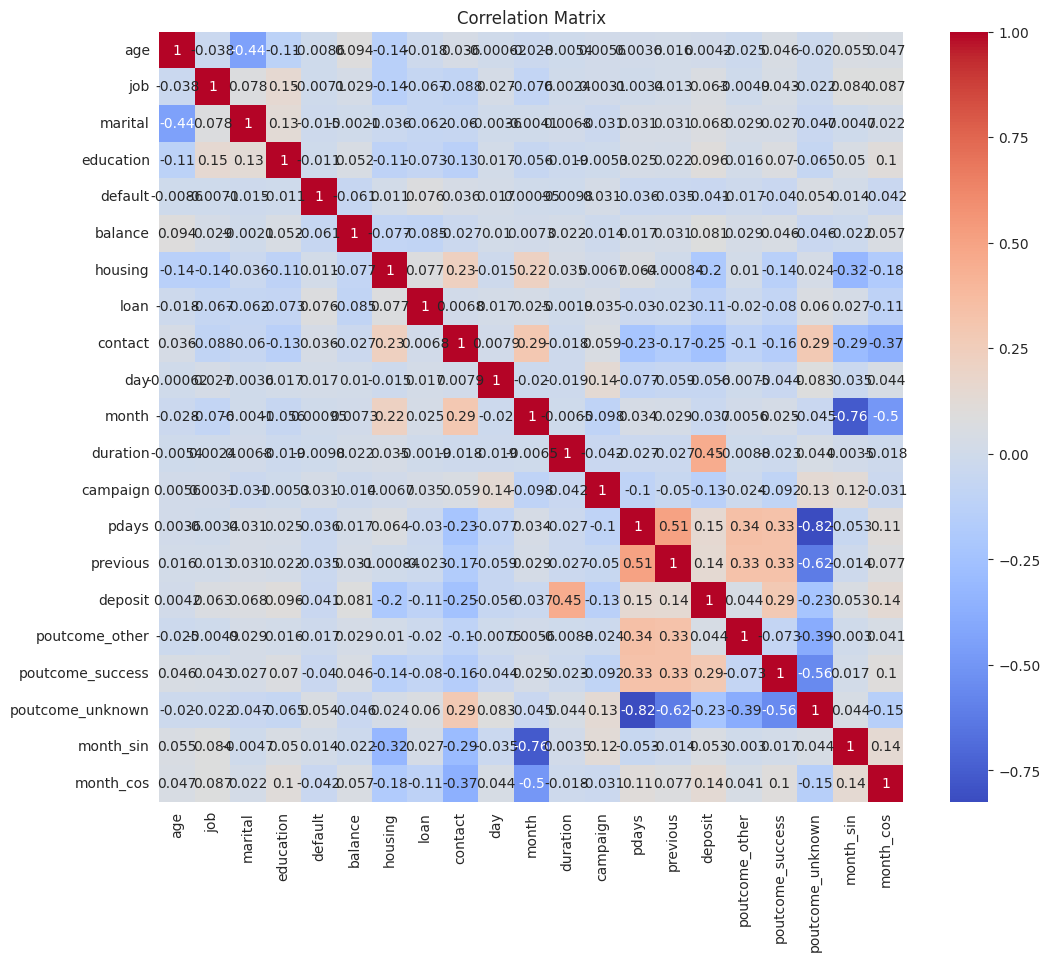

In [83]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

the magnitude of the correlation coefficient indicates the strength of the correlation:

* Close to 1 or -1: Strong correlation.
* Close to 0: Weak correlation.



so there is a meaningful correlation between target value and duration or housing and we can use these in our machine learning models

# ****1.4****

# Hypothesis tests

Hypothesis tests are statistical techniques used to make inferences about a population based on a sample of data. These tests help to assess the validity of assumptions and draw conclusions about the characteristics of the population. Hypothesis testing is a crucial component of both Exploratory Data Analysis (EDA) and model building in data science and statistics.

use in eda: Hypothesis tests can be used to identify patterns and relationships in the data. For example, a correlation test can quantify the strength and direction of relationships between numerical variables. They can also be used to assess the significance of individual features with respect to the target variable. This aids in feature selection by identifying features that are likely to have a meaningful impact on the target.

use in model building: Hypothesis tests can be used to assess the importance of individual variables in predicting the target variable. This information is valuable in feature engineering and model selection. Many statistical models have underlying assumptions that need to be met for the model to be valid. Hypothesis tests can help assess whether these assumptions are violated, and corrective measures can be taken.Also, Hypothesis tests can be used to compare the performance of different models. For example, a hypothesis test comparing the residuals of two models can help determine if one significantly outperforms the other.

# ****1.5.1****


#### Hypothesis on whether or not marital status has an effect on whether the client has a personal loan


* Null Hypothesis (H0): Marital status and having a personal loan are independent.
* Alternative Hypothesis (H1): Marital status and having a personal loan are dependent.

In this example, if the p-value is less than the chosen significance level (we use 0.05), we would reject the null hypothesis, suggesting that there is evidence of an association between marital status and having a personal loan. Otherwise, we would fail to reject the null hypothesis.

In [62]:
contingency_table = pd.crosstab(data['marital'], data['loan'])

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of an association between marital status and having a personal loan.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an association between marital status and having a personal loan.")

Chi-square statistic: 48.87044484505704
P-value: 2.4429677724750932e-11
Reject the null hypothesis. There is evidence of an association between marital status and having a personal loan.


# ****1.5.2****


#### Hypothesis on the effect of the previous marketing campaign on the client


* Null Hypothesis (H0): The success of the previous marketing campaign and subscribing to a term deposit are independent.
* Alternative Hypothesis (H1): The success of the previous marketing campaign and subscribing to a term deposit are dependent.

In this example, if the p-value is less than the chosen significance level (we used 0.05), we would reject the null hypothesis, suggesting that there is evidence of an association between the success of the previous marketing campaign and subscribing to a term deposit. Otherwise, we would fail to reject the null hypothesis

In [63]:
contingency_table = pd.crosstab(data1['poutcome'], data['deposit'])  

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of an association between the success of the previous marketing campaign and subscribing to a term deposit.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an association between the success of the previous marketing campaign and subscribing to a term deposit.")

Chi-square statistic: 1004.635780185333
P-value: 1.7761850102620281e-217
Reject the null hypothesis. There is evidence of an association between the success of the previous marketing campaign and subscribing to a term deposit.


# ****1.5.3****


#### Hypothesis on if the type of job has an effect on credit default.


* Null Hypothesis (H0): The type of job and credit default are independent.
* Alternative Hypothesis (H1): The type of job and credit default are dependent.

In this example, if the p-value is less than the chosen significance level (we used 0.05), we would reject the null hypothesis, suggesting that there is evidence of an association between the type of job and credit default. Otherwise, we would fail to reject the null hypothesis.

In [64]:
contingency_table = pd.crosstab(data['job'], data['default']) 

# Perform the chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of an association between the type of job and credit default.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an association between the type of job and credit default.")

Chi-square statistic: 30.95897743096264
P-value: 0.0011181856351128675
Reject the null hypothesis. There is evidence of an association between the type of job and credit default.


# ****1.6****


#### Mann-Whitney U hypothesis Test for Duration and Campaign Outcome 

* Null Hypothesis (H0): There is no difference in the distribution of call durations between clients with different campaign outcomes.

* Alternative Hypothesis (H1): There is a difference in the distribution of call durations between clients with different campaign outcomes.

In [65]:
success_duration = data1[data1['poutcome'] == 'success']['duration']
failure_duration = data1[data1['poutcome'] == 'failure']['duration']

# Perform the Mann-Whitney U Test
statistic, p_value = mannwhitneyu(success_duration, failure_duration)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a difference in the distribution of call durations between clients with different campaign outcomes.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a difference in the distribution of call durations between clients with different campaign outcomes.")

Mann-Whitney U statistic: 734644.5
P-value: 1.2163314506474121e-06
Reject the null hypothesis. There is evidence of a difference in the distribution of call durations between clients with different campaign outcomes.


# ****1.6****


#### Kruskal-Wallis H hypothesis test for Duration and Education Level

* Null Hypothesis (H0): There is no difference in the distribution of call durations among different education levels.

* Alternative Hypothesis (H1): There is a difference in the distribution of call durations among different education levels.

In [66]:
edu_levels = data['education'].unique()
edu_duration = [data[data['education'] == edu]['duration'] for edu in edu_levels]

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*edu_duration)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Kruskal-Wallis H statistic: {statistic}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a difference in the distribution of call durations among different education levels.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a difference in the distribution of call durations among different education levels.")

Kruskal-Wallis H statistic: 0.8686599449930512
P-value: 0.8329835296526691
Fail to reject the null hypothesis. There is no evidence of a difference in the distribution of call durations among different education levels.


# ****1.7****

### t-test hypothesis

T-tests are statistical tests that are used to compare the means of two groups and determine if there is a significant difference between them. These tests are widely used in various fields, including statistics, economics, psychology, and biology, to name a few. T-tests are particularly useful when working with small sample sizes.

The implications of t-test results depend on the context and the specific hypotheses being tested. Here are some key points to consider:
* Null Hypothesis (H0): In a t-test, the null hypothesis typically states that there is no significant difference between the means of the two groups.
* Alternative Hypothesis (H1): The alternative hypothesis asserts that there is a significant difference between the means of the two groups.
* P-Value: The p-value is a key output of a t-test. It represents the probability of observing the data if the null hypothesis is true. If the p-value is below the chosen significance level (commonly 0.05), the null hypothesis is rejected.
* Significance Level (Alpha): Researchers choose a significance level (alpha) to determine the threshold for rejecting the null hypothesis. Common values are 0.05 or 0.01.
* Conclusion: If the p-value is less than or equal to alpha, the result is considered statistically significant, and the null hypothesis is rejected. If the p-value is greater than alpha, there is insufficient evidence to reject the null hypothesis.
* Effect Size: In addition to statistical significance, it's important to consider the effect size, which quantifies the magnitude of the observed difference. A small p-value may not necessarily imply a large practical significance.
* Interpretation:A significant result suggests that there is evidence for a difference between the groups, but it does not provide information about the size or practical importance of the difference. Consideration of context, practical significance, and relevant domain knowledge is crucial for a comprehensive interpretation.

####  t-test hypothesis on whether the average balance in a bank dataset is significantly different from a certain value

* Null Hypothesis (H0): The average balance in the population is equal to the hypothesized population mean (e.g., 5000).
* Alternative Hypothesis (H1): The average balance in the population is not equal to the hypothesized population mean.

The one-sample t-test will output a t-statistic and a p-value. If the p-value is less than the chosen significance level (we use 0.05), we would reject the null hypothesis, suggesting that there is evidence that the average balance is significantly different from the hypothesized population mean. If the p-value is greater than the significance level, you would fail to reject the null hypothesis.

In [67]:
sample_mean = data['balance'].mean()  # Sample mean
population_mean = 5000  # Hypothesized population mean

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(data['balance'], population_mean)

# Set the significance level (alpha)
alpha = 0.05

print(f"One-sample t-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the average balance is significantly different from the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the average balance is significantly different from the hypothesized population mean.")

One-sample t-statistic: -14420544.794149235
P-value: 0.0
Reject the null hypothesis. There is evidence that the average balance is significantly different from the hypothesized population mean.


## **1.7.1**

The paired t-test is a statistical test used to determine whether there is a significant difference between the means of two related groups. It is particularly applicable when the data is paired or matched, meaning that there is a natural pairing of observations 

Reasoning Behind the Paired T-Test:
* Comparison of Before-and-After Measurements: Paired t-tests are often used when you have measurements on the same group or individual before and after some treatment, intervention, or event. The test helps assess whether there is a statistically significant difference in the means of the paired observations.

* Control for Individual Differences: By using paired observations, the test controls for individual differences or variations that may exist between different subjects. It is especially useful in experimental designs where each subject serves as their own control.

* Increased Sensitivity: Paired t-tests can be more sensitive than independent t-tests when there is variability within the groups. This increased sensitivity comes from considering the within-subject differences.

In [87]:
balance = data['balance']
duration = data['duration']

t_statistic, p_value = ttest_rel(balance, duration)

print(f"Paired t-test results - t-statistic: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("The p-value is less than 0.05, suggesting a significant difference.")
    print("There is evidence to reject the null hypothesis.")
else:
    print("The p-value is greater than 0.05, indicating no significant difference.")
    print("There is insufficient evidence to reject the null hypothesis.")


Paired t-test results - t-statistic: -0.28894550062406393, p-value: 0.7726284499655663
The p-value is greater than 0.05, indicating no significant difference.
There is insufficient evidence to reject the null hypothesis.


The p-value (0.7726) is greater than the significance level of 0.05.
Since the p-value is not less than 0.05, there is insufficient evidence to reject the null hypothesis.
The conclusion is that there is no significant difference between the means of the paired 'balance' and 'duration' values.

# ****1.8****

### chi-squered

Chi-square tests are a family of statistical tests that are used to assess the association between categorical variables. These tests compare the observed distribution of categorical data with the expected distribution under a specific hypothesis. chi-squered determines whether there is a significant association between two categorical variables.

Applications of Chi-Square Tests:
* Social Sciences: Examining the relationship between gender and voting preferences. Investigating the association between education level and political affiliation.
* Biology: Studying the distribution of genotypes in a population. Analyzing the relationship between two genetic traits.
* Market Research: Assessing whether there is a significant association between product preference and age group. Testing the goodness-of-fit of survey responses to expected market segment proportions.
* Epidemiology:Investigating the association between smoking status and the occurrence of a respiratory disease. Assessing whether the distribution of a specific disease varies across different regions.


'marital' and 'target': The chi-square statistic of 196.50, coupled with an exceptionally low p-value of 2.15e-43, indicates a highly significant association between marital status and the outcome of subscribing to a term deposit. This suggests that a client's marital status is likely to exert influence on their decision to subscribe to a term deposit.

'education' and 'deposit': With a chi-square value of 233.75 and a remarkably low p-value of 1.75e-51, there is substantial evidence pointing towards a significant association between education level and the behavior of subscribing to term deposits. This implies that a client's education level is likely to be linked with their decision-making process concerning term deposit subscriptions.

Both outcomes strongly imply the existence of a meaningful relationship between marital status, education level, and the behavior of subscribing to term deposits in the Bank Marketing dataset. These findings hold potential significance for targeting specific demographics or customizing marketing strategies based on marital status and education to enhance subscription outcomes.

In [70]:
marital_target_crosstab = pd.crosstab(data['marital'], data['deposit'])
chi2_marital, p_value_marital, _, _ = chi2_contingency(marital_target_crosstab)
print(f"Chi-square test between 'marital' and 'target': Chi2 value: {chi2_marital}, p-value: {p_value_marital}")

# Chi-square test between 'education' and 'target'
education_target_crosstab = pd.crosstab(data['education'], data['deposit'])
chi2_education, p_value_education, _, _ = chi2_contingency(education_target_crosstab)
print(f"Chi-square test between 'education' and 'target': Chi2 value: {chi2_education}, p-value: {p_value_education}")


Chi-square test between 'marital' and 'target': Chi2 value: 109.58335610012479, p-value: 1.600576988089358e-24
Chi-square test between 'education' and 'target': Chi2 value: 122.77008967211442, p-value: 1.9534186354212715e-26
